In [1]:
import geopandas as gpd 
import osmnx 
import contextily as cx 
import matplotlib.pyplot as plt 
import pandas as pd 
import sys


In [2]:
#For printing all columns
pd.set_option('display.max_columns', None)


In [50]:
#Read in Copenhagen data
#df_cph = pd.read_csv("data/data_Cph.csv", index_col=0)
gdf_cph= gpd.read_file("data/data_cph.json")
gdf_cph=gdf_cph.set_index("id")
gdf_cph.head()

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry
id,,,,,,,,,,,,,,,,,,,,,
0,None,None,None,None,None,None,None,node,None,None,swimming_pool,None,None,None,13873814,None,None,None,node/13873814,None,POINT (12.63967 55.65514)
1,waste_basket,None,None,None,None,None,None,node,None,None,None,None,None,None,20944608,None,None,None,node/20944608,None,POINT (12.63625 55.65714)
2,post_box,None,None,None,None,None,None,node,None,None,None,None,None,None,24952644,None,None,None,node/24952644,None,POINT (12.55088 55.70141)
3,pub,None,None,None,None,None,None,node,None,None,None,Ølbaren,None,"Mo 21:00-01:00, Tu-We 16:00-01:00, Th 16:00-02...",24958713,None,None,None,node/24958713,http://oelbaren.dk/,POINT (12.55783 55.68929)
4,post_office,None,None,None,None,None,None,node,None,None,None,Nordvest Postkontor,None,None,24959262,None,None,None,node/24959262,None,POINT (12.52959 55.70355)


In [51]:
#Check for columns only containing nan and drop these
for i in gdf_cph.columns:
    if gdf_cph[i].isnull().values.all() == True:
        gdf_cph = gdf_cph.drop(i, axis=1)
gdf_cph=gdf_cph.dropna(subset=['name'])


In [52]:
gdf_cph

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry
id,,,,,,,,,,,,,,,,,,,,,
3,pub,None,None,None,None,None,None,node,None,None,None,Ølbaren,None,"Mo 21:00-01:00, Tu-We 16:00-01:00, Th 16:00-02...",24958713,None,None,None,node/24958713,http://oelbaren.dk/,POINT (12.55783 55.68929)
4,post_office,None,None,None,None,None,None,node,None,None,None,Nordvest Postkontor,None,None,24959262,None,None,None,node/24959262,None,POINT (12.52959 55.70355)
5,restaurant,None,None,None,regional,None,None,node,None,None,None,Nørrebro Bryghus Restaurant,None,"Mo-Th 12:00-15:00,17:30-22:00; Fr-Sa 12:00-15:...",24971137,None,None,None,node/24971137,https://noerrebrobryghus.dk/,POINT (12.56391 55.69022)
6,None,None,None,None,None,None,None,node,None,None,None,Den lille Havfrue,None,None,25074274,None,None,artwork,node/25074274,None,POINT (12.59926 55.69286)
7,cinema,None,None,None,None,None,None,node,None,None,None,Empire Bio,None,12:00-22:30,25440190,None,None,None,node/25440190,https://www.empirebio.dk/,POINT (12.55582 55.69195)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25112,school,None,None,None,None,None,None,relation,None,None,None,Guldberg Skole,"[ [ [ 1644767287, 1644767281, 1644767346, 1644...",None,12671081,None,None,None,relation/12671081,None,"MULTIPOLYGON (((12.55220 55.69657, 12.55238 55..."
25113,school,None,None,None,None,None,None,relation,None,None,None,Skolen ved Søerne,"[ [ [ 1638768885, 1638768902, 1638768858, 1638...","Mo-Fr 08:00-10:30,12:00-14:00",12734639,None,None,None,relation/12734639,https://skolenvedsoerne.aula.dk/,"MULTIPOLYGON (((12.55248 55.67847, 12.55246 55..."
25115,university,None,None,None,None,None,None,relation,info@kadk.dk,None,None,Det Kongelige Danske Kunstakademis Skoler for ...,"[ [ [ 6327154706, 8814063717, 8814049716, 8814...",None,12822695,None,None,None,relation/12822695,https://kadk.dk/,"MULTIPOLYGON (((12.60272 55.68173, 12.60342 55..."


In [53]:
#Read in Copenhagen data
gdf_aarhus = gpd.read_file("data/data_aarhus.json")
gdf_aarhus=gdf_aarhus.set_index("id")
gdf_aarhus.head()

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry
id,,,,,,,,,,,,,,,,,,,,,
0,fuel,None,None,None,None,None,None,node,None,None,None,Uno-X,None,None,33694221,None,None,None,node/33694221,None,POINT (10.23554 56.20715)
1,post_box,None,None,None,None,None,None,node,None,None,None,None,None,None,61783581,None,None,None,node/61783581,None,POINT (10.23149 56.22741)
2,fuel,None,None,None,None,None,None,node,None,None,None,Q8,None,None,119286594,None,None,None,node/119286594,None,POINT (10.28086 56.21179)
3,fuel,None,None,None,None,None,None,node,None,None,None,Uno X,None,None,245550748,None,None,None,node/245550748,None,POINT (10.18027 56.15369)
4,fuel,None,None,None,None,None,None,node,None,None,None,Ingo,None,None,247135581,None,ingo.se,None,node/247135581,None,POINT (10.16796 56.13248)


In [54]:
#Check for columns only containing nan and drop these
for i in gdf_aarhus.columns:
    if gdf_aarhus[i].isnull().values.all() == True:
        gdf_aarhus = gdf_aarhus.drop(i, axis=1)
        
gdf_aarhus=gdf_aarhus.dropna(subset=['name'])


In [55]:
gdf_aarhus

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry
id,,,,,,,,,,,,,,,,,,,,,
0,fuel,None,None,None,None,None,None,node,None,None,None,Uno-X,None,None,33694221,None,None,None,node/33694221,None,POINT (10.23554 56.20715)
2,fuel,None,None,None,None,None,None,node,None,None,None,Q8,None,None,119286594,None,None,None,node/119286594,None,POINT (10.28086 56.21179)
3,fuel,None,None,None,None,None,None,node,None,None,None,Uno X,None,None,245550748,None,None,None,node/245550748,None,POINT (10.18027 56.15369)
4,fuel,None,None,None,None,None,None,node,None,None,None,Ingo,None,None,247135581,None,ingo.se,None,node/247135581,None,POINT (10.16796 56.13248)
5,fuel,None,None,None,None,None,None,node,None,None,None,Ingo,None,None,247135582,None,ingo.se,None,node/247135582,None,POINT (10.20636 56.10393)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9394,community_centre,None,None,None,None,None,None,relation,None,None,None,Sports- og Kulturcampus,"[ [ [ 8698997745, 8698997744, 8698997743, 8698...",None,12667531,None,None,None,relation/12667531,https://sportsogkulturcampus.aarhus.dk/,"POLYGON ((10.13508 56.16012, 10.13490 56.16009..."
9395,school,None,None,None,None,None,None,relation,None,None,None,Aarhus Business College,"[ [ [ 1384338446, 8700605550, 8700605551, 8700...",None,12669445,None,None,None,relation/12669445,None,"MULTIPOLYGON (((10.15743 56.11939, 10.15769 56..."
9396,None,None,None,None,None,None,None,relation,INFO@MOESGAARDMUSEUM.DK,None,None,Moesgaard Museum,"[ [ [ 8718456554, 8718456553, 8718456552, 8718...","Tu, Th-Fr 09:00-17:00; We 09:00-21:00; Sa-Su 0...",12695640,None,None,museum,relation/12695640,https://www.moesgaardmuseum.dk/,"POLYGON ((10.22272 56.08879, 10.22271 56.08881..."


<AxesSubplot:>

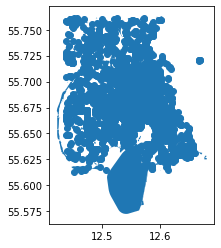

In [56]:
gdf_cph.plot()

<AxesSubplot:>

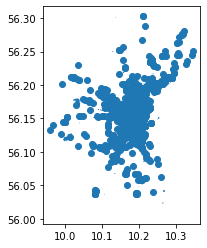

In [57]:
gdf_aarhus.plot()

In [58]:
#Find all types of amenities, tourism and leisure in Copenhagen
print("Unique values in amenity tag Copenhagen", gdf_cph["amenity"].unique())
print("Unique values in tourism tag Copenhagen", gdf_cph["tourism"].unique())
print("Unique values in leisure tag Copenhagen", gdf_cph["leisure"].unique())

#Also find these points for Aarhus
print("Unique values in amenity tag Aarhus", gdf_aarhus["amenity"].unique())
print("Unique values in tourism tag Aarhus", gdf_aarhus["tourism"].unique())
print("Unique values in leisure tag Aarhus", gdf_aarhus["leisure"].unique())

Unique values in amenity tag Copenhagen ['pub' 'post_office' 'restaurant' None 'cinema' 'bar' 'fire_station'
 'fuel' 'swingerclub' 'nightclub' 'library' 'townhall' 'police'
 'fast_food' 'college' 'cafe' 'theatre' 'bank' 'toilets' 'school' 'clinic'
 'veterinary' 'compressed_air' 'atm' 'pharmacy' 'place_of_worship'
 'bureau_de_change' 'money_transfer' 'car_rental' 'courthouse'
 'bus_station' 'traffic_school' 'kindergarten' 'university' 'ice_cream'
 'bicycle_parking' 'bicycle_rental' 'flowers' 'recycling' 'ferry_terminal'
 'events_venue' 'stripclub' 'gambling' 'internet_cafe' 'photo' 'fountain'
 'parking' 'arts_centre' 'parking_entrance' 'publisher' 'vending_machine'
 'boat_rental' 'bicycle_repair_station' 'hospital' 'car_wash' 'clock'
 'driving_school' 'shelter' 'music_venue' 'studio' 'dentist' 'doctors'
 'community_centre' 'user_defined' 'childcare' 'dancing_school'
 'social_facility' 'coworking_space' 'taxi' 'charging_station' 'brothel'
 'public_bookcase' 'parliament' 'monastery' 'kitc

In [80]:
#Keep only the specific values we want based on the previous list of unique elements

keep_list_a = ['pub', 'restaurant', 'cinema', 'bar', 'nightclub', 'cafe', 'theatre', 'place_of_worship',
                              'ice_cream', 'bicycle_rental', 'flowers', 'fountain', 'arts_centre', 'boat_rental', 'music_venue',
                              'monastery', 'club', 'deli', 'gallery', 'marketplace', 'biergarten', 'wine_storage', 
                              'surf_school', 'food_court','food_sharing', 'planetarium', 'festival_grounds']

keep_list_t = ['picnic_site', 'viewpoint', 'artwork', 'museum', 'gallery', 'theme_park', 'attraction']

keep_list_l = ['sports_centre', 'playground', 'bowling_alley', 'trampoline_park', 'adult_gaming_centre',
                              'escape_game', 'garden', 'marina', 'miniature_golf','ceramic_painting', 'cooking_classes',
                              'park', 'dog_park', 'recreation_ground', 'stadium', 'water_park', 'swimming_pool', 'building', 
                              'paintball', 'horse_riding']

#Copenhagen
gdf_cph_a=gdf_cph[gdf_cph.amenity.isin(keep_list_a)]

gdf_cph_t=gdf_cph[gdf_cph.tourism.isin(keep_list_t)]
        

gdf_cph_l=gdf_cph[gdf_cph.leisure.isin(keep_list_l)]

gdf_cph_all = pd.concat([gdf_cph_a, gdf_cph_t, gdf_cph_l])

#Aarhus
gdf_aarhus_a=gdf_aarhus[gdf_aarhus.amenity.isin(keep_list_a)]

gdf_aarhus_t=gdf_aarhus[gdf_aarhus.tourism.isin(keep_list_t)]
        

gdf_aarhus_l=gdf_aarhus[gdf_aarhus.leisure.isin(keep_list_l)]

gdf_aarhus_all = pd.concat([gdf_aarhus_a, gdf_aarhus_t, gdf_aarhus_l])

gdf_cph_all

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry
id,,,,,,,,,,,,,,,,,,,,,
3,pub,None,None,None,None,None,None,node,None,None,None,Ølbaren,None,"Mo 21:00-01:00, Tu-We 16:00-01:00, Th 16:00-02...",24958713,None,None,None,node/24958713,http://oelbaren.dk/,POINT (12.55783 55.68929)
5,restaurant,None,None,None,regional,None,None,node,None,None,None,Nørrebro Bryghus Restaurant,None,"Mo-Th 12:00-15:00,17:30-22:00; Fr-Sa 12:00-15:...",24971137,None,None,None,node/24971137,https://noerrebrobryghus.dk/,POINT (12.56391 55.69022)
7,cinema,None,None,None,None,None,None,node,None,None,None,Empire Bio,None,12:00-22:30,25440190,None,None,None,node/25440190,https://www.empirebio.dk/,POINT (12.55582 55.69195)
8,pub,None,None,None,None,None,None,node,None,None,None,Bankeråt,None,Mo-Fr 09:30-24:00;Sa-Su 10:30-24:00,25440922,None,None,None,node/25440922,http://www.bankeraat.dk,POINT (12.56518 55.68341)
10,bar,None,None,None,None,None,None,node,None,None,None,Black Swan,None,"Mo-We 15:00-01:00, Th-Sa 15:00-02:00, Su 15:00...",25869217,None,None,None,node/25869217,http://www.blackswanbar.dk/,POINT (12.58743 55.68649)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25079,None,None,None,None,None,None,None,relation,None,None,sports_centre,Bellahøj Hallerne,"[ [ [ 6118307434, 6118303798, 448705420, 44870...",None,9080471,None,None,None,relation/9080471,None,"POLYGON ((12.51428 55.70600, 12.51432 55.70608..."
25083,None,None,None,None,None,None,None,relation,None,None,park,Digterlunden,"[ [ [ 4379055581, 4379055582, 3327855372, 3327...",None,9792033,None,None,None,relation/9792033,None,"MULTIPOLYGON (((12.53199 55.67596, 12.53249 55..."
25105,None,None,None,None,None,None,None,relation,None,None,park,Kagsåparken,"[ [ [ 1582802307, 8459010980, 8459010981, 1582...",None,12365635,None,None,None,relation/12365635,None,"MULTIPOLYGON (((12.45036 55.73215, 12.45132 55..."


In [82]:
#Check for columns only containing nan and drop these
#Copenhagen
for i in gdf_cph_all.columns:
    if gdf_cph_all[i].isnull().values.all() == True:
        print("column", i, gdf_cph_all[i].isna().values.all())
        gdf_cph_all = gdf_cph_all.drop(i, axis=1)

#Aarhus
for i in gdf_aarhus_all.columns:
    if gdf_aarhus_all[i].isnull().values.all() == True:
        print("column", i, gdf_aarhus_all[i].isna().values.all())
        gdf_aarhus_all = gdf_aarhus_all.drop(i, axis=1)


<AxesSubplot:>

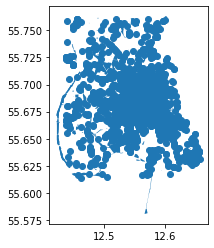

In [83]:
gdf_cph_all.plot()

<AxesSubplot:>

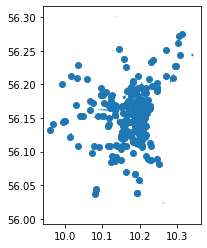

In [84]:
gdf_aarhus_all.plot()

In [85]:
#Copenhagen
for i in gdf_cph_all["amenity"].unique():
    if i not in keep_list_a:
        print("Amenities that reoccured", i)
        
for i in gdf_cph_all["tourism"].unique():
    if i not in keep_list_t:
        print("Tourism that reoccured", i)
        
for i in gdf_cph_all["leisure"].unique():
    if i not in keep_list_l:
        print("Leisure that reoccured", i)

#Aarhus        
for i in gdf_aarhus_all["amenity"].unique():
    if i not in keep_list_a:
        print("Amenities that reoccured Aarhus", i)
        
for i in gdf_aarhus_all["tourism"].unique():
    if i not in keep_list_t:
        print("Tourism that reoccured Aarhus", i)
        
for i in gdf_aarhus_all["leisure"].unique():
    if i not in keep_list_l:
        print("Leisure that reoccured Aarhus", i)

Amenities that reoccured None
Amenities that reoccured public_bookcase
Amenities that reoccured fast_food
Amenities that reoccured university
Amenities that reoccured bbq
Amenities that reoccured townhall
Tourism that reoccured None
Tourism that reoccured hotel
Tourism that reoccured yes
Leisure that reoccured None
Leisure that reoccured fussball
Leisure that reoccured handicraft
Amenities that reoccured Aarhus None
Tourism that reoccured Aarhus None
Tourism that reoccured Aarhus hotel
Leisure that reoccured Aarhus None
Leisure that reoccured Aarhus dance


In [70]:
#Checking these specific values to see what rows they occur in and whether these rows are relevant
gdf_cph_all.loc[gdf_cph_all['amenity'] == 'public_bookcase']

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry
id,,,,,,,,,,,,,,,,,,,,,
4436,public_bookcase,None,None,None,None,None,None,node,None,None,None,Bogbørsen,None,None,3813183021,None,None,attraction,node/3813183021,http://www.gentofte.dk/Om-kommunen/Nyheder/201...,POINT (12.57197 55.76018)


In [71]:
gdf_cph_all.loc[gdf_cph_all['amenity'] == 'fast_food']

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry
id,,,,,,,,,,,,,,,,,,,,,
8315,fast_food,None,None,None,None,None,None,node,None,None,None,Dinos Legeland,None,"Mo-Fr 10:00-19:00; Sa,Su 09:30-19:00",6700902449,None,None,theme_park,node/6700902449,https://dinoslegeland.dk/oerestad/,POINT (12.57448 55.61966)
6963,fast_food,None,None,None,burger,None,yes,node,None,None,miniature_golf,"Camping Kødbyen - Minigolf, bar & burgers",None,None,5299629819,None,None,None,node/5299629819,https://www.camping.bar/kodbyen,POINT (12.55894 55.66686)


In [72]:
gdf_cph_all.loc[gdf_cph_all['amenity'] == 'university']

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry
id,,,,,,,,,,,,,,,,,,,,,
14925,university,None,None,None,None,None,None,way,None,None,None,Kommunitetsbygningen,"[ 295317809, 1458183231, 1458183205, 145818321...",None,26950614,None,None,attraction,way/26950614,None,"POLYGON ((12.57144 55.68045, 12.57146 55.68040..."


In [73]:
gdf_cph_all.loc[gdf_cph_all['amenity'] == 'bbq']

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry
id,,,,,,,,,,,,,,,,,,,,,
15654,bbq,None,None,None,None,None,None,way,None,None,None,Picnicøen,"[ 1368691967, 1368691850, 1368691950, 13686919...",None,122496443,None,None,picnic_site,way/122496443,None,"POLYGON ((12.57776 55.63332, 12.57782 55.63333..."


In [74]:
gdf_cph_all.loc[gdf_cph_all['amenity'] == 'townhall']

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry
id,,,,,,,,,,,,,,,,,,,,,
25006,townhall,None,None,None,None,None,None,relation,rundvisning@okf.kk.dk,None,None,Københavns Rådhus,"[ [ [ 5308323041, 9107374471, 9107374470, 9107...",None,52142,None,None,attraction,relation/52142,None,"POLYGON ((12.57106 55.67534, 12.57147 55.67514..."


We see that all these values are ones we want to keep. We do the same for the tourism and leisure tags 

In [75]:
gdf_cph_all.loc[gdf_cph_all['tourism'] == 'hotel']

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry
id,,,,,,,,,,,,,,,,,,,,,
477,restaurant,None,None,None,None,None,None,node,None,None,None,Hebron,None,None,298796142,None,None,hotel,node/298796142,https://www.hebron.dk/,POINT (12.56078 55.67262)


In [76]:
gdf_cph_all.loc[gdf_cph_all['tourism'] == 'yes']

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry
id,,,,,,,,,,,,,,,,,,,,,
15770,None,None,None,None,None,None,None,way,None,None,park,Naturcenter Amager,"[ 1470583920, 1470607752, 8547901593, 14706715...",None,133625979,None,None,yes,way/133625979,https://naturstyrelsen.dk/naturoplevelser/unde...,"POLYGON ((12.57492 55.61382, 12.57386 55.61428..."


In [78]:
gdf_cph_all.loc[gdf_cph_all['leisure'] == 'fussball']

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry
id,,,,,,,,,,,,,,,,,,,,,
603,bar,vangandbar,None,None,None,None,None,node,info@flisenbarandburgers.dk,None,fussball,Vang & Bar,None,Tu 16:00-24:00; We 16:00-01:00; Th-Sa 16:00-02:00,442948295,None,None,None,node/442948295,https://www.vangandbar.com/,POINT (12.54216 55.66321)


In [79]:
gdf_cph_all.loc[gdf_cph_all['leisure'] == 'handicraft']

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry
id,,,,,,,,,,,,,,,,,,,,,
14005,bar,None,None,None,None,None,None,node,None,None,handicraft,The Fiddlery,None,10:00-22:00; Fr-Sa 10:00-24:00,9350660863,None,None,None,node/9350660863,https://thefiddlery.dk/,POINT (12.57608 55.69766)


We also do this for Aarhus.

In [88]:
gdf_aarhus_all.loc[gdf_aarhus_all['tourism'] == 'hotel']

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry
id,,,,,,,,,,,,,,,,,,,,,
6168,None,None,None,None,None,None,None,way,None,None,sports_centre,Vilhelmsborg Ridecenter,"[ 2887792961, 2887792962, 2887792965, 28877929...",None,285094506,None,None,hotel,way/285094506,None,"POLYGON ((10.18761 56.06702, 10.18783 56.06704..."


In [89]:
gdf_aarhus_all.loc[gdf_aarhus_all['leisure'] == 'dance']

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry
id,,,,,,,,,,,,,,,,,,,,,
2174,music_venue,None,None,None,None,None,None,node,None,None,dance,CasaV58,None,None,5682665985,None,None,None,node/5682665985,https://www.casacarola.dk/,POINT (10.20062 56.15796)


We now save these cleaned data files to json-format.

In [90]:
#Saving cleaned Copenhagen data
with open('data/data_cleaned_cph.json', 'w') as f:
    f.write(gdf_cph_all.to_json())

#Saving cleaned Aarhus data
with open('data/data_cleaned_aarhus.json', 'w') as f:
    f.write(gdf_aarhus_all.to_json())

## Plotideer: 
- plot med mængden af data hvis man inkluderede alt vs. når man kun inkluderer bestemte tags
- Distribution over tags, hvor mange barer, cafeer osv.
- flot plot over københavn eller aarhus eller hvor vi ender 



In [33]:
import matplotlib.pyplot as plt

In [47]:
sorted(pois["amenity"].value_counts(), ascending=True)

TypeError: 'ascending' is an invalid keyword argument for sort()

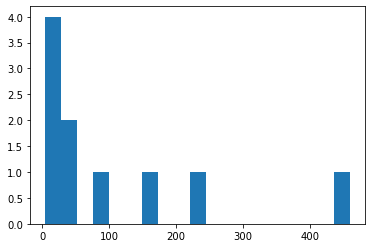

In [43]:
plt.hist(sorted(pois["amenity"].value_counts()[:10]), bins=len(pois["amenity"].unique()))
plt.show()